# Chapter 02 - Model Evaluation for Forecasting


## Listing 2-1.Getting the stock data example into Python.


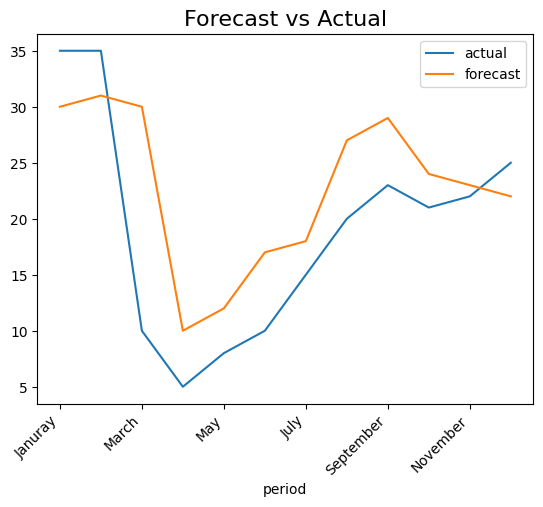

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

period = [
    "Januray",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

actual = [35, 35, 10, 5, 8, 10, 15, 20, 23, 21, 22, 25]

forecast = [30, 31, 30, 10, 12, 17, 18, 27, 29, 24, 23, 22]

data = pd.DataFrame({"period": period, "actual": actual, "forecast": forecast})

ax = data.plot.line(x="period")
ax.set_title("Forecast vs Actual", fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()


<Axes: title={'center': 'Forecast vs Actual'}, xlabel='period'>

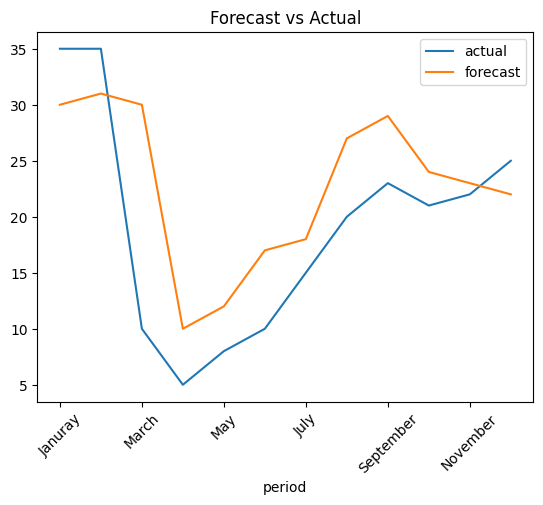

In [3]:
# Alternatively you could just use pandas directly
data.plot.line(x="period", title="Forecast vs Actual", rot=45)

## Listing 2-2. Computing the Mean Squared Error in Python.


In [6]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(data["actual"], data["forecast"]))

53.666666666666664


## Listing 2-3. Computing the Root Mean Squared Error in Python.


In [5]:
from sklearn.metrics import root_mean_squared_error

print(root_mean_squared_error(data["actual"], data["forecast"]))


7.32575365861197


## Listing 2-4. Computing the R2 in Python.


In [8]:
from sklearn.metrics import r2_score

r2_score(data["actual"], data["forecast"])


0.39976699029126206

## Listing 2-5.Computing the Mean Absolute Error in Python.


In [9]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(data["actual"], data["forecast"]))


5.666666666666667


## Listing 2-6. Computing the Mean Absolute Percent Error in Python.


In [10]:
from sklearn.metrics import mean_absolute_percentage_error

print(mean_absolute_percentage_error(data["actual"], data["forecast"]))


0.46469367588932814


## Listing 2-7. Train Test Split in Python.


In [12]:
from sklearn.model_selection import train_test_split

y = data["actual"]
train, test = train_test_split(y, test_size=0.3, shuffle=False)
forecast = train.mean()  # forecast is 17.25
train = pd.DataFrame(train)
train["forecast"] = forecast
train_error = mean_squared_error(train["actual"], train["forecast"])

test = pd.DataFrame(test)
test["forecast"] = forecast
test_error = mean_squared_error(test["actual"], test["forecast"])
print(f"train_error={train_error}, test_error={test_error}")


train_error=122.9375, test_error=32.4375


## Listing 2-8. Train Validation Test Split in Python.


In [13]:
# Splitting into 70% train, 15% validation and 15% test
train, test = train_test_split(data['actual'], test_size = 0.3, shuffle = False, random_state=12345)
val, test = train_test_split(test, test_size = 0.5, shuffle = False, random_state=12345)

# Fit (estimate) the two models on the train data
forecast_mean = train.mean() # 17.25
forecast_median = train.median() # 12.5

# Compute MSE on validation data for both models
val = pd.DataFrame(val)

val['forecast_mean'] = forecast_mean
val['forecast_median'] = forecast_median

mean_val_mse = mean_squared_error(val['actual'], val['forecast_mean'])
median_val_mse = mean_squared_error(val['actual'], val['forecast_median'])

# You observe the following validation mse: mean mse: 23.56, median mse: 91.25
print(f"mean_val_mse={mean_val_mse}, median_val_mse={median_val_mse}") 

# The best performance is the mean model, so verify its error on test data
test = pd.DataFrame(test)
test['forecast_mean'] = forecast_mean

mean_test_mse = mean_squared_error(test['actual'], test['forecast_mean'])

# You observe a test mse of 41.3125, almost double the validation mse
print(f"mean_test_mse={mean_test_mse}")


mean_val_mse=23.5625, median_val_mse=91.25
mean_test_mse=41.3125


## Listing 2-9. K-fold cross-validation in Python.


In [15]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

errors = []
for train_index, test_index in kf.split(data):
    train = data.iloc[train_index, :]
    test = data.iloc[test_index, :]

    pred = train["actual"].mean()
    test["forecast"] = pred
    error = mean_squared_error(test["actual"], test["forecast"])
    errors.append(error)

print(f"CV Error={np.mean(errors)}")


CV Error=106.10234567901234


## Listing 2-10. Time Series Cross-Valdiation in Python.


In [18]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit()

errors = []
for train_index, test_index in tscv.split(data):
    train = data.iloc[train_index, :]
    test = data.iloc[test_index, :]
    pred = train["actual"].mean()
    test["forecast"] = pred
    error = mean_squared_error(test["actual"], test["forecast"])
    errors.append(error)

print(f"CV Error={np.mean(errors)}")


CV Error=194.76522222222223


## Listing 2-11 Rolling Time Series Cross-Valdiation in Python.


In [19]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(max_train_size=2)

errors = []
for train_index, test_index in tscv.split(data):
    train = data.iloc[train_index, :]
    test = data.iloc[test_index, :]

    pred = train["actual"].mean()
    test["forecast"] = pred
    error = mean_squared_error(test["actual"], test["forecast"])
    errors.append(error)

print(f"CV Error={np.mean(errors)}")


CV Error=174.0
